In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import json
import pprint
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

from IPython.display import *

### Loading and Cleaning with Pandas

In [3]:
with open('dataset/review.json', 'r', encoding="utf-8") as review:
    review_data = [json.loads(line) for line in review]
    review_df = pd.DataFrame(review_data)
    print("Loaded Reviews. Total ", review_df.size, " records")

with open('dataset/business.json', 'r', encoding="utf-8") as business:
    business_data = [json.loads(line) for line in business]
    business_df = pd.DataFrame(business_data)
    print("Loaded Businesses. Total ", business_df.size, " records")
    
with open('dataset/user.json', 'r', encoding="utf-8") as user:
    user_data = [json.loads(line) for line in user]
    user_df = pd.DataFrame(user_data)
    print("Loaded Users. Total ", user_df.size, " records")

Loaded Reviews. Total  42632073  records
Loaded Businesses. Total  2349585  records
Loaded Users. Total  26033964  records


In [4]:
review_df.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww


In [5]:
business_df.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON


In [6]:
user_df.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,569,1834,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,0,1,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31


In [7]:
print(business_df.shape)
print(business_df.dtypes)

(156639, 15)
address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object


In [8]:
print(user_df.shape)
print(user_df.dtypes)

(1183362, 22)
average_stars         float64
compliment_cool         int64
compliment_cute         int64
compliment_funny        int64
compliment_hot          int64
compliment_list         int64
compliment_more         int64
compliment_note         int64
compliment_photos       int64
compliment_plain        int64
compliment_profile      int64
compliment_writer       int64
cool                    int64
elite                  object
fans                    int64
friends                object
funny                   int64
name                   object
review_count            int64
useful                  int64
user_id                object
yelping_since          object
dtype: object


In [9]:
print(review_df.shape)
print(review_df.dtypes)

(4736897, 9)
business_id    object
cool            int64
date           object
funny           int64
review_id      object
stars           int64
text           object
useful          int64
user_id        object
dtype: object


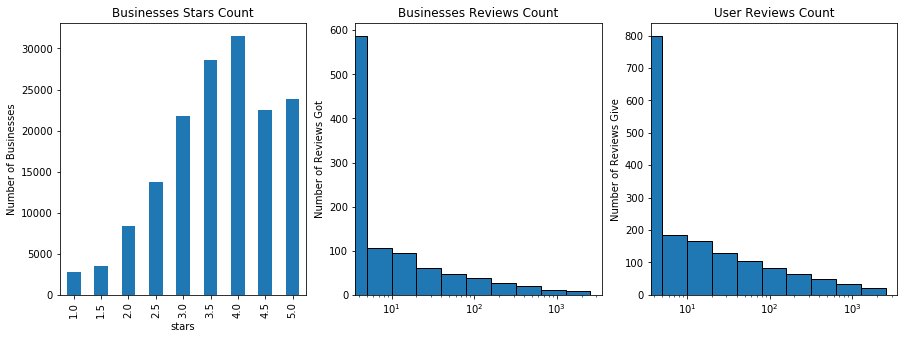

In [10]:
fig = plt.figure(figsize = (15,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

business_df.groupby('stars').size().plot(kind='bar', ax = ax0)
ax0.set_title('Businesses Stars Count')
ax0.set_ylabel('Number of Businesses')

business_review_count = business_df.groupby('review_count').size()
bins=[0, 5, 10, 20, 40, 80,160, 320, 640, 1280, 2560]
ax1.hist(business_review_count, bins=bins, edgecolor="k")
ax1.set_title('Businesses Reviews Count')
ax1.set_ylabel('Number of Reviews Got')
ax1.set_xscale('log')

business_review_count = user_df.groupby('review_count').size()
bins=[0, 5, 10, 20, 40, 80,160, 320, 640, 1280, 2560]
ax2.hist(business_review_count, bins=bins, edgecolor="k")
ax2.set_title('User Reviews Count')
ax2.set_ylabel('Number of Reviews Give')
ax2.set_xscale('log')

fig.savefig('plot1.png')

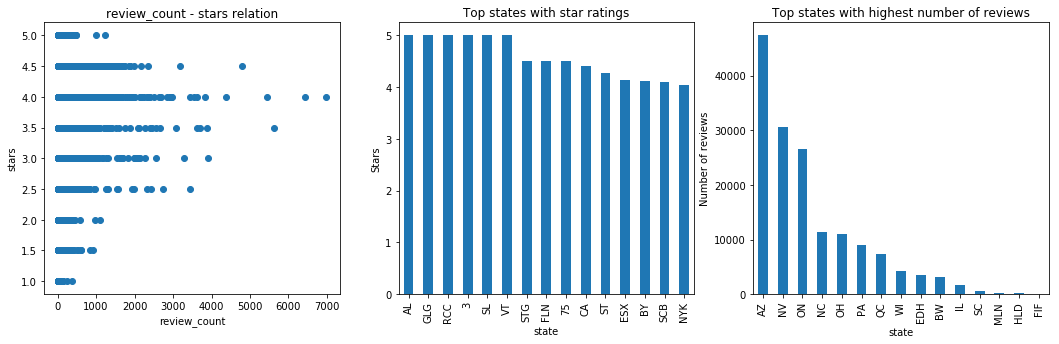

In [11]:
fig = plt.figure(figsize = (18,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

ax0.scatter(business_df['review_count'], business_df['stars'])
ax0.set_title('review_count - stars relation')
ax0.set_xlabel('review_count')
ax0.set_ylabel('stars')

business_df[['state', 'stars']].groupby('state')['stars'].agg('mean').sort_values(ascending = False).head(15).plot(kind = 'bar', ax=ax1)
ax1.set_title('Top states with star ratings')
ax1.set_ylabel('Stars')

business_df[['state', 'stars']].groupby('state')['stars'].count().sort_values(ascending = False).head(15).plot(kind = 'bar', ax=ax2)
ax2.set_title('Top states with highest number of reviews')
ax2.set_ylabel('Number of reviews')

fig.savefig('plot2.png')

### Data Selection/Cleaning

In [12]:
# First of all let's filter out closed businesses 
open_business_df = business_df[business_df['is_open'] == 1]
print("After removing businesses that are closed we left with ", open_business_df.size, " records")

# Next, filter out all none restaurant businesses, because we only care about restaurants
restaurant_df = open_business_df[open_business_df['categories'].apply(lambda x: 'Restaurants' in x)]
print("Open restaurant business records: ", restaurant_df.size)

After removing businesses that are closed we left with  1983930  records
Open restaurant business records:  579855


In [48]:
restaurant_df['business_hours'][:1]

14    {'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...
Name: business_hours, dtype: object


In [14]:
print(len(restaurant_hours))
print(len(restaurant_df['hours']) == len(restaurant_hours))

# Work in progress on adding hour columns before training

38657
True


In [42]:
print(restaurant_df.dtypes)

business_address          object
business_attributes       object
business_id               object
business_categories       object
business_city             object
business_hours            object
business_is_open           int64
business_latitude        float64
business_longitude       float64
business_name             object
business_neighborhood     object
business_postal_code      object
business_review_count      int64
business_stars           float64
business_state            object
dtype: object


In [16]:
# Append `business_` and `review_` prefix to all columns in restaurants and reviews dataframe 
# to distinguish columns after merge
restaurant_df.columns = ['business_' + str(col) for col in restaurant_df.columns]
review_df.columns = ['review_' + str(col) for col in review_df.columns]
# rename *_id columns back 
restaurant_df.rename(columns={"business_business_id": "business_id"}, inplace=True)
review_df.rename(columns={"review_business_id": "business_id", 
                          "review_review_id": "review_id", 
                          "review_user_id": "user_id"}, inplace=True)

/Users/rburdakov/anaconda/envs/3point6/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [18]:
yelp_reviews = pd.merge(pd.merge(restaurant_df, review_df, on='business_id', how='left'),
              user_df, on='user_id', how='left')
yelp_reviews.head(3)

,business_address,business_attributes,business_id,business_categories,business_city,business_hours,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,review_cool,review_date,review_funny,review_id,review_stars,review_text,review_useful,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,yelping_since
0,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,0,2016-04-06,0,EBTHgI_19gtQfivTJlsPkA,2,I hadn't been to a Applebee's for a few years....,0,M0cI78odeq_GKqLzk8sIrw,3.49,0,0,0,0,0,0,1,0,0,0,0,1,[],0,"[EPDSZUPujQGhluDYdf55hw, BTGB7ZoCMCclhZL0gd9SI...",1,Murray,49,10,2010-11-09
1,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,0,2016-04-10,0,fT9506-dhjrMTmYLJO0xmg,3,I am an avid Applebees fan. In high school I u...,0,4i0NQ2eyuQZKpXbz8TxBEg,4.10,0,0,0,0,0,0,0,0,0,0,0,0,[],0,"[d9Ls7HeX4dBqlubUBf1PoQ, nOcoxf8AAYpT4hbWiziVp...",1,Katie,20,0,2010-01-01
2,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,0,2017-03-22,0,-Ojqi_nKPwl8HhN8ShzlaA,4,Pleasantly surprised. Better than expected a...,0,kABsypSKvgLPkqd2YIWB8Q,4.00,0,0,0,0,0,0,0,0,0,0,0,1,[],0,[NMcdjEAbH1G1SSDu8T4AGA],0,Howard,1,0,2014-10-03


In [35]:
# save_msk = np.random.rand(len(yelp_reviews)) < 0.6
# yelp_reviews[save_msk].to_csv('dataset/restaurant_yelp_reviews.csv')

In [19]:
print("Merged data frame contains ", yelp_reviews.columns.size, " columns:\n\n", yelp_reviews.columns.tolist())

Merged data frame contains  44  columns:

 ['business_address', 'business_attributes', 'business_id', 'business_categories', 'business_city', 'business_hours', 'business_is_open', 'business_latitude', 'business_longitude', 'business_name', 'business_neighborhood', 'business_postal_code', 'business_review_count', 'business_stars', 'business_state', 'review_cool', 'review_date', 'review_funny', 'review_id', 'review_stars', 'review_text', 'review_useful', 'user_id', 'average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful', 'yelping_since']


In [76]:
# We need to process hours column to factor out time
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
open_close = ['_open', '_close']

def get_hours(df):
    hours = []
    for index, row in df.iterrows():
        record = {'business_id': row['business_id']}
        s = row['business_hours']
        for d in days:
            opn = 0.0
            cls = 0.0
            if d in s:
                hourz = s[d].split('-')
                hrs1 = hourz[0].split(':')
                hrs2 = hourz[1].split(':')

                opn = float(hrs1[0]) + float(hrs1[1])/60
                cls = float(hrs2[0]) + float(hrs2[1])/60

                # handle overnight hours
                if (opn > cls):
                    cls += 24

            record[str(d) + '_open'] = opn
            record[str(d) + '_close'] = cls
            
        hours.append(record)
    return hours

restaurant_hours = get_hours(restaurant_df[['business_id', 'business_hours']])

In [117]:
restaurant_hours_df = pd.DataFrame(restaurant_hours)
restaurant_df_merged = restaurant_df.merge(restaurant_hours_df, on=['business_id'])
restaurant_df_merged.head(3)

,business_address,business_attributes,business_id,business_categories,business_city,business_hours,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open
0,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0
1,190 E Dallas Rd,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5
2,4759 Liberty Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,"{'Sunday': '8:00-12:00', 'Tuesday': '8:00-12:0...",1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0


In [109]:
# Next let's take a look at all categories that has 'Restaurant'
categories = set()
restaurant_df_merged['business_categories'].apply(lambda r: categories.update(r))
len(categories)

635

In [129]:
def process_categories(df):
    records = []
    for index, row in df.iterrows():
        record = {'business_id': row['business_id']}
        current_cats = row['business_categories']
        for c in current_cats:
            record[c] = 1
        records.append(record)
    return records

b_cats = process_categories(restaurant_df_merged)

In [130]:
cats_df = pd.DataFrame(b_cats).fillna(0)
cats_df.head(3)

,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Animal Shelters,Antiques,Apartments,Appliances,Appliances & Repair,Aquarium Services,Aquariums,Arabian,Arcades,Argentine,Armenian,Art Classes,Art Galleries,Art Schools,Arts & Crafts,Arts & Entertainment,Asian Fusion,Australian,Austrian,Auto Customization,Auto Detailing,Auto Glass Services,Auto Insurance,Auto Parts & Supplies,Auto Repair,Auto Upholstery,Automotive,Baby Gear & Furniture,...,Trinidadian,Truck Rental,Turkish,Tuscan,Udon,Ukrainian,Used,Uzbek,Vacation Rentals,Vape Shops,Vegan,Vegetarian,Vehicle Wraps,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vinyl Siding,Vitamins & Supplements,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos,business_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SDMRxmcKPNt1AHPBKqO64Q
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iFEiMJoEqyB9O8OUNSdLzA
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HmI9nhgOkrXlUr6KZGZZew


In [118]:
restaurant_df_merged = restaurant_df_merged.merge(cats_df, on=['business_id'])
restaurant_df_merged.head(3)

,business_address,business_attributes,business_id,business_categories,business_city,business_hours,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),...,Travel Services,Trinidadian,Truck Rental,Turkish,Tuscan,Udon,Ukrainian,Used,Uzbek,Vacation Rentals,Vape Shops,Vegan,Vegetarian,Vehicle Wraps,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vinyl Siding,Vitamins & Supplements,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190 E Dallas Rd,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4759 Liberty Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,"{'Sunday': '8:00-12:00', 'Tuesday': '8:00-12:0...",1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
restaurant_df_merged.isnull().values.any()

False

In [207]:
def process_attributes(df):
    records = []
    for i, row in df.iterrows():
        attrs = row['business_attributes']
        for key, val in attrs.items():
            if key == 'Alcohol':
                if val == 'full_bar':
                    attrs[key] = True
                else:
                    attrs[key] = False
                    
            if key == 'Smoking':
                # we will treat outdoor as not allowed 
                if val == 'no' or val == 'outdoor':
                    attrs[key] = False
                else:
                    attrs[key] = True
        
        for k, v in attrs.get('BusinessParking', {}).items():
            attrs['BusinessParking_' + k] = v
           
        for k, v in attrs.get('Ambience', {}).items():
            attrs['Ambience_' + k] = v
            
        for k, v in attrs.get('GoodForMeal', {}).items():
            attrs['GoodForMeal_' + k] = v
        
        for k, v in attrs.get('Music', {}).items():
            attrs['Music_' + k] = v
        
        # removed records that we have processed as well as remove 
        # HairSpecializesIn which isn't relevant for restaurants
        for k in ['BusinessParking', 'Ambience', 'GoodForMeal', 
                  'Music', 'HairSpecializesIn']: 
            attrs.pop(k, None)
                
        attrs['business_id'] = row['business_id']
        records.append(attrs)
    return records

b_attrs = process_attributes(restaurant_df_merged)

In [206]:
pd.DataFrame(b_attrs)['ByAppointmentOnly'].unique()

array([nan, False, True], dtype=object)

In [208]:
pd.DataFrame(b_attrs).head(5)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch,HappyHour,HasTV,Music_background_music,Music_dj,Music_jukebox,Music_karaoke,Music_live,Music_no_music,Music_video,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,breakfast,brunch,business_id,casual,classy,dessert,dinner,divey,garage,hipster,intimate,latenight,lot,lunch,romantic,street,touristy,trendy,upscale,valet,validated
0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,True,NaN,True,False,False,False,False,False,NaN,False,False,NaN,NaN,NaN,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,average,NaN,False,casual,NaN,False,True,2.0,False,False,True,NaN,NaN,free,False,False,SDMRxmcKPNt1AHPBKqO64Q,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iFEiMJoEqyB9O8OUNSdLzA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,True,NaN,True,False,False,True,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,False,False,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loud,NaN,False,casual,NaN,False,False,1.0,False,True,True,NaN,NaN,no,True,False,HmI9nhgOkrXlUr6KZGZZew,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average,NaN,True,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,free,NaN,NaN,qnpvw-uQyRn9nlClWFK9aA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,False,True,False,False,False,False,False,False,False,False,NaN,NaN,NaN,True,NaN,True,False,True,False,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,True,NaN,True,no,False,False,TXiEgINSZ75d3EtvLvkc4Q,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
# those columns are ready
# 'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage', 'DogsAllowed', 'DriveThru','GoodForDancing', 'GoodForKids', 'HappyHour', 'HasTV', 'OutdoorSeating', 'Open24Hours', 'RestaurantsTakeOut', 'RestaurantsTableService', 'RestaurantsReservations',
# 'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'RestaurantsDelivery', 'RestaurantsCounterService', 
# 'WiFi', 'RestaurantsAttire', 'NoiseLevel'


# this needs to be categorized
# 'DietaryRestrictions', 'BusinessParking', 

In [133]:
restaurant_df_merged.drop(['business_attributes', 'business_hours', 'business_categories'], axis=1)

,business_address,business_id,business_city,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Animal Shelters,Antiques,...,Travel Services,Trinidadian,Truck Rental,Turkish,Tuscan,Udon,Ukrainian,Used,Uzbek,Vacation Rentals,Vape Shops,Vegan,Vegetarian,Vehicle Wraps,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vinyl Siding,Vitamins & Supplements,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,9616 E Independence Blvd,SDMRxmcKPNt1AHPBKqO64Q,Matthews,1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.00,24.0,11.00,24.0,11.0,24.0,11.0,24.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190 E Dallas Rd,iFEiMJoEqyB9O8OUNSdLzA,Stanley,1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.50,22.0,11.50,22.0,11.5,22.0,11.5,22.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4759 Liberty Ave,HmI9nhgOkrXlUr6KZGZZew,Pittsburgh,1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.00,12.0,8.00,12.0,8.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7070 Saint Barbara Boulevard,qnpvw-uQyRn9nlClWFK9aA,Mississauga,1,43.639236,-79.716199,Wild Wing,Meadowvale Village,L5W 0E6,6,2.5,ON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4502 East Towne Blvd,TXiEgINSZ75d3EtvLvkc4Q,Madison,1,43.128034,-89.307157,Red Lobster,,53704,45,3.0,WI,23.0,11.0,22.0,11.0,23.0,11.00,22.0,11.00,22.0,11.0,22.0,11.0,22.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1794 Liverpool Road,KW4y7uDGjVfU3ClkEjIGhg,Pickering,1,43.834351,-79.090135,The Works,,L1V 1V9,41,3.0,ON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [27]:
# msk = np.random.rand(len(yelp_reviews)) < 0.7
# train_df = yelp_reviews[msk]
# test_df = yelp_reviews[~msk]

# train_df = train_df.reset_index(drop=True)
# test_dataset = test_df.reset_index(drop=True)

In [29]:
# from all test data get test and validate sets
val_msk = np.random.rand(len(test_dataset)) < 0.5
test_df = test_dataset[val_msk]
valid_df = test_dataset[~val_msk]

In [32]:
# X and y Train/Test data frames.
y_train = train_df.copy()['business_stars']
X_train = train_df.drop('business_stars', axis=1)
y_test = test_df.copy()['business_stars']
X_test = test_df.drop('business_stars', axis=1)

In [43]:
print(train_df.dtypes)

business_address          object
business_attributes       object
business_id               object
business_categories       object
business_city             object
business_hours            object
business_is_open           int64
business_latitude        float64
business_longitude       float64
business_name             object
business_neighborhood     object
business_postal_code      object
business_review_count      int64
business_stars           float64
business_state            object
review_cool                int64
review_date               object
review_funny               int64
review_id                 object
review_stars               int64
review_text               object
review_useful              int64
user_id                   object
average_stars            float64
compliment_cool            int64
compliment_cute            int64
compliment_funny           int64
compliment_hot             int64
compliment_list            int64
compliment_more            int64
compliment

In [ ]:
# result dictionary
r2_dict = {'alpha': [], 'ridge':[], 'lasso':[]}

#List of Lambda (lol!) values
lol = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]

# Find R^2 scores for each model (Linear, Lasso, Ridge) while
# varying alpha value for Lasso and Ridge models.
for alpha in lol:
    r2_dict['alpha'].append(alpha)
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X_train, y_train)
    
    lasso_preds = lasso.predict(X_test)
    r2_dict['lasso'].append(r2_score(y_test, lasso_preds))
    
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(X_train, y_train)
    ridge_preds = ridge.predict(X_test)
    r2_dict['ridge'].append(r2_score(y_test, ridge_preds))

# build data frame and inspect data.
r2_df = pd.DataFrame(r2_dict)
r2_df.head()

### EDA and revised project statement

#### 1. Description of the data

3 of the 6 yelp datasets that we are interested are consist of records:<br>
Reviews - <b>42 632 073</b> Businesses - <b>2 349 585</b> Users - <b>2 6033 964</b><br>
After finding a way to read data into dataframe (we couldn't load it by regular way), we observed data columns and corresponding types:

![](img/datashape_and_columns.png)

#### 2. Visualizations and captions that summarize the noteworthy findings of the EDA

After reading description of every field, we embarked on EDA to explore data relationship. Some of the questions we had ansewered are including but not limited by:
<ol>
<li>How many stars a business usually get? -> Most businesses have starts of 4 and 3.5. A small number of business has start that is under 1.5</li>
<li>How many reviews a business usually get? -> We can see most of the business have reviews that is less than 10, very few business have more than 300 reviews.</li>
<li>How many reviews a user usually give? -> We can see the majority of the user give less than 10 reviews to businesses</li>
<li>How does the reviews_count and star of a business related? -> Business that has more than 1000 reviews are most likey to get 2.5 to 4 stars.</li>
<li>Is there a relationship between review_count and stars? -> It seems like businesses with higher review count most likely to have 4 star rating</li>
</ol>

![](img/plot1.png)
![](img/plot2.png)

Running EDA on entire data set seemed to be a problem due to somewhat large datasets. On our fastest laptop - we could wait over 15 mins for one plot to finish. Hence, we cleaned business dataset by filtering out all businesses that are <b>closed</b>. While they can provide some interest to us, we believe that size of the population isn't a problem given the initial data size (`42.6` m). In addition, we had filtered out businesses that don't have `Restaurant` in their <u>categories</u>, since based on our project goal we are focusing just on restaurant businesses. Hence, we ended up with `579855` records which is `1.36%` from our initial input for bussiness. 

After that we have build a data frame by joining reviews with business through `business_id` (left outter join) result was then joined with user data frame by `user_id` (also left outter join). Be we joined 3 data frames, we renamed columns to be prefixed with original dataframe name. This was done to avoid confusion betwen review rating and business rating. After merged we ended up with 44 columns. Not all of those columns will be used in training data set.

To predict a rating that a user will give to a particular business, the important predictors are most likely to be `average_start` and `review_count` from the user, `stars` and `review_count` from the business. `compliment_hot`, `compliment_more` and so on from a user means how active this user is in the community, so the bigger value of those columns, the more trustworthy the review from this user would be. However, this data are not tied to one business, so  they may not be very sigificant to our variable.  

For the next (and final) milestone we are looking for building 4 models (baseline, regularized regression (Ridge), matrix factorization and either RF or ADABoost) to predict start rating for a given restaurant. We will build a simple static web page to summarize our project findings and hopefully we will have enough time to build a little demo.

#### 3. Revised project question based on the insights from EDA

After close looking at EDAs, we have decided to stick to our original question which should be formed as:

### For a given user, can we predict star rating that user will give corresponding restaurant?

Knowing this information would be very usefull to provide all sorts of recomendations for a registered user. Our goal would be to mimic existing yelp where a registered user looks for restaurant recomendations within a certain area (zip code). Yelp, isn't just listing all places filtered by highest ratings, distance or number of reviews. Instead it applies its trained model to find places (excluding paid accounts that are boosted to the top), which most likely will receive good rating and review if a given user would visit it.